# GDSCv2 Interpretation

This notebook shows some example on how to interpret the output from the Bayesian model to infer responses of basket/cluster combinations.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append('..')
sys.path.append('.')

In [3]:
from pyBasket.common import load_obj
from pyBasket.interpret import get_predicted_basket_df, get_basket_cluster_prob_df, find_top_k_indices, find_bottom_k_indices
from pyBasket.interpret import select_partition, plot_responsive_count, get_member_expression, ttest_dataframe
from pyBasket.interpret import plot_expression_boxplot, df_diff, plot_basket_probs, plot_basket_cluster_heatmap
from pyBasket.clustering import plot_PCA

# Load results

Load previously saved results

In [4]:
drug_name = 'Erlotinib'
C = 10

In [5]:
input_dir = 'results'
file_name = 'patient_analysis_%s_cluster_%d.p' % (drug_name, C)
save_data = load_obj(os.path.join(input_dir, file_name))

In [6]:
list(save_data.keys())

['expr_df_filtered',
 'expr_df_selected',
 'drug_response',
 'class_labels',
 'cluster_labels',
 'patient_df',
 'stacked_posterior',
 'trace',
 'importance_df']

# Things to show in the viz

## Basket probabilities

In [7]:
predicted_basket_df = get_predicted_basket_df(save_data)
predicted_basket_df

,prob
Biliary Tract,0.676355
Bladder/Urinary Tract,0.639912
Bone,0.518524
Bowel,0.540074
Breast,0.395533
Cervix,0.176984
CNS/Brain,0.711437
Esophagus/Stomach,0.525731
Head and Neck,0.126352
Kidney,0.374972


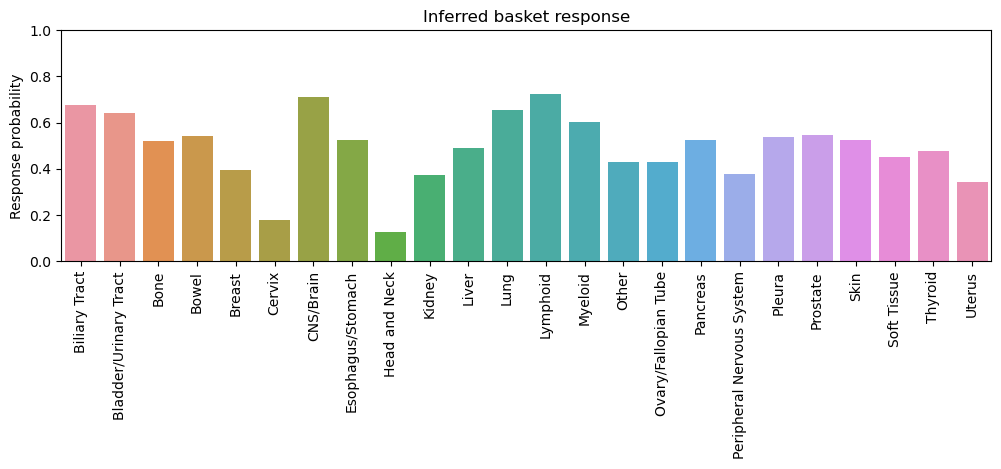

In [8]:
plot_basket_probs(predicted_basket_df)

## Overall heatmap

In [9]:
inferred_df = get_basket_cluster_prob_df(save_data)

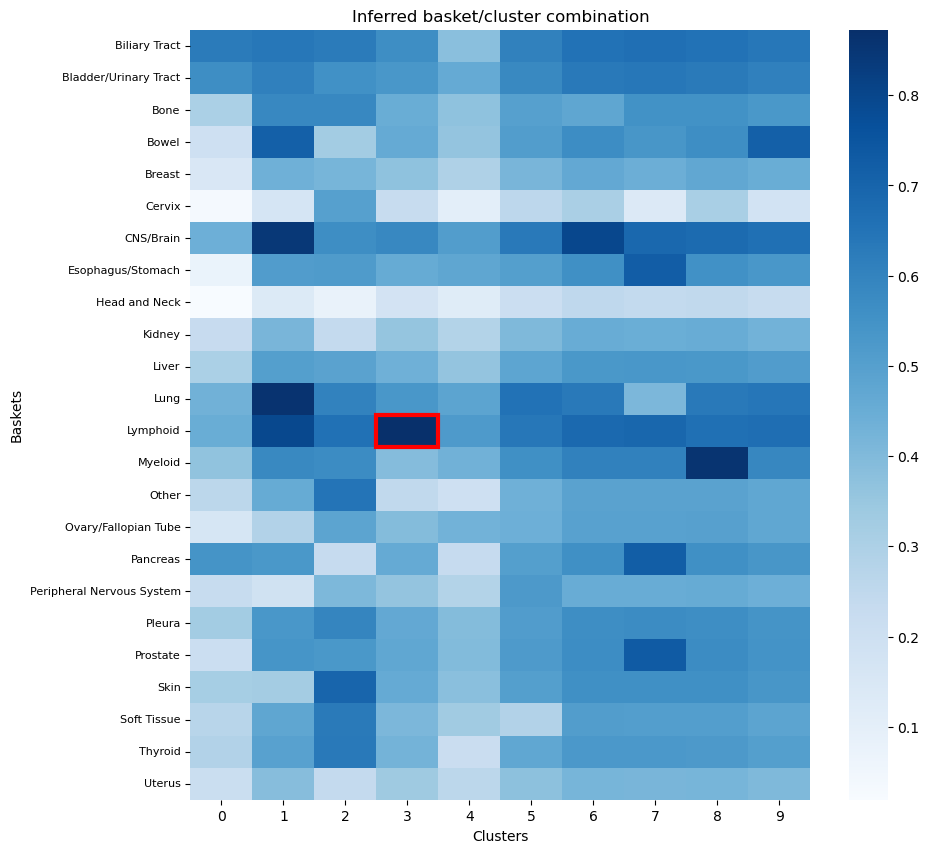

In [10]:
plot_basket_cluster_heatmap(inferred_df, 3, 12)

# Any interesting data to look at?

## Which basket/cluster combinations have the highest / lowest response rates?

In [11]:
top_df = find_top_k_indices(save_data, 10)
top_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,12,3,Lymphoid,3,0.872544,26
1,11,1,Lung,1,0.860262,3
2,13,8,Myeloid,8,0.855964,9
3,6,1,CNS/Brain,1,0.843743,2
4,6,6,CNS/Brain,6,0.798482,1
5,12,1,Lymphoid,1,0.794397,1
6,19,7,Prostate,7,0.729919,1
7,7,7,Esophagus/Stomach,7,0.724014,1
8,16,7,Pancreas,7,0.721039,1
9,3,1,Bowel,1,0.713589,1


In [12]:
bottom_df = find_bottom_k_indices(save_data, 10)
bottom_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,8,0,Head and Neck,0,0.019096,12
1,5,0,Cervix,0,0.033006,7
2,7,0,Esophagus/Stomach,0,0.073574,6
3,8,2,Head and Neck,2,0.079377,3
4,5,4,Cervix,4,0.102819,1
5,15,0,Ovary/Fallopian Tube,0,0.120766,1
6,8,1,Head and Neck,1,0.133621,1
7,5,7,Cervix,7,0.136623,2
8,4,0,Breast,0,0.149647,1
9,8,4,Head and Neck,4,0.159788,0


## Inspect one partition

In [13]:
query_basket = 'Lymphoid'
query_cluster = 8
selected_df = select_partition(save_data, query_basket, query_cluster)
selected_df

,tissues,responses,basket_number,cluster_number,responsive
samples,,,,,
GR-ST,Lymphoid,0.050943,12,8,1
VAL,Lymphoid,0.003482,12,8,1
BE-13,Lymphoid,0.147782,12,8,0
P30/OHK,Lymphoid,0.153038,12,8,0
U-698-M,Lymphoid,0.000000,12,8,1
MN-60,Lymphoid,0.009550,12,8,1
Karpas-45,Lymphoid,0.075559,12,8,0
BALL-1,Lymphoid,0.032240,12,8,1
Ramos.2G6.4C10,Lymphoid,0.037024,12,8,1


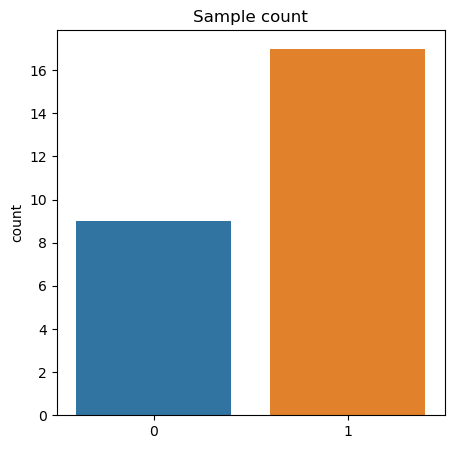

In [14]:
plot_responsive_count(selected_df)

In [15]:
member_df = get_member_expression(selected_df, save_data)
member_df.shape

(26, 500)

PCA explained variance [0.1789462 0.2813458]


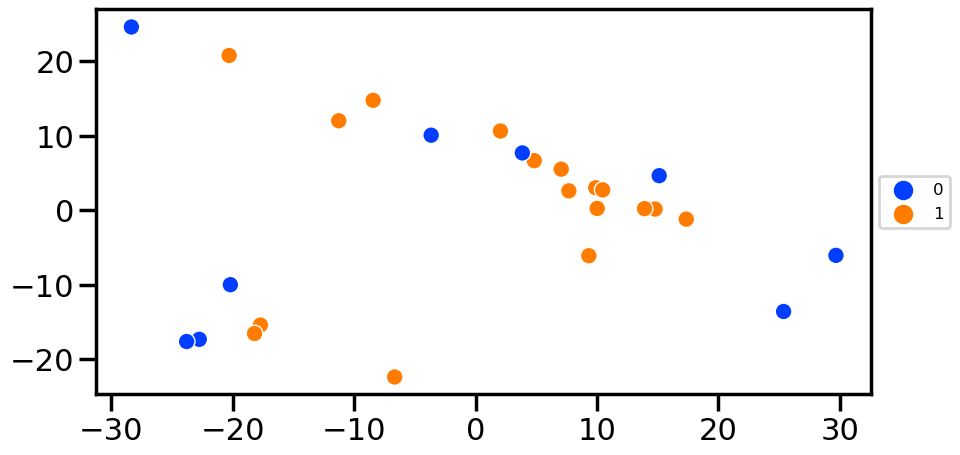

In [16]:
pc1, pc2 = plot_PCA(member_df, hue=selected_df['responsive'], n_components=2)

Pick the first transcript as it has the highest importance score during feature selection.

In [17]:
all_expr_df = df_diff(member_df, save_data['expr_df_selected'])
all_expr_df.shape

(272, 500)

In [18]:
test_df = ttest_dataframe(member_df, all_expr_df, only_significant=True)
test_df

,T-Statistic,P-Value,P-Value (Bonferroni),Significant
Feature,,,,
ENSG00000153714.6,-15.376034,1.275387e-39,6.376935e-37,True
ENSG00000071564.16,12.048586,1.795102e-27,8.975508e-25,True
ENSG00000198624.13,12.008580,2.485498e-27,1.242749e-24,True
ENSG00000074590.13,-11.832869,1.033377e-26,5.166885e-24,True
ENSG00000196754.12,-11.431535,2.604163e-25,1.302081e-22,True
...,...,...,...,...
ENSG00000065328.16,4.017084,7.477337e-05,3.738669e-02,True
ENSG00000153936.17,3.997731,8.081317e-05,4.040658e-02,True
ENSG00000165799.5,-3.980253,8.666360e-05,4.333180e-02,True


In [19]:
selected_feature = test_df.index.values[0]
selected_feature

'ENSG00000153714.6'

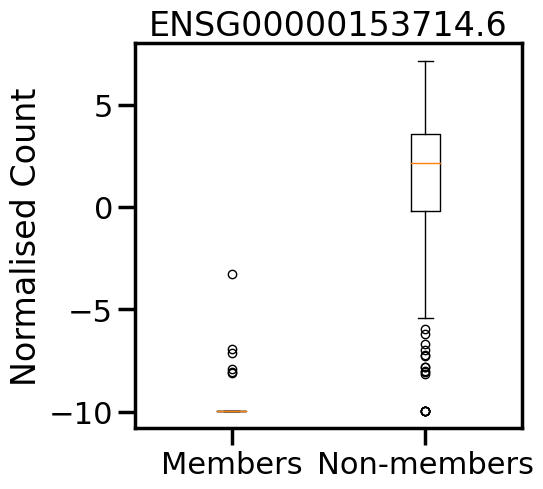

In [20]:
plot_expression_boxplot(selected_feature, member_df, all_expr_df)